In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [288]:
N = 20
size = 1
np.random.seed(0)

X_bias = np.ones(N)
X_1 = np.random.random_sample(N) * size
X_2 = np.random.random_sample(N) * size

X_1.sort()
X = np.array([X_bias, X_1, X_2])
Y = np.array([0] * N//2 + [1] * N//2)
W = np.zeros(3)

In [295]:
def classify(X_c, W_c):
    return (X_c.T * W_c).sum(axis=1) > 0

def evaluate(predictions, Y_truth):
    return predictions == Y_truth

def update(X_c, W_c, Y_truth):
    results = evaluate(classify(X_c, W_c), Y_truth)
    
    try:
        ix = np.random.choice(np.argwhere(~results).ravel())
    except ValueError:
        return W_c
    
    y = 1 if Y_truth[ix] else -1
    return W_c + X_c[:, ix] * y

(0, 1)

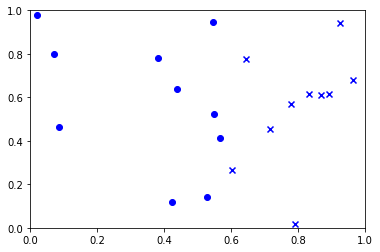

In [289]:
plt.scatter(X_1[Y.astype(bool)], X_2[Y.astype(bool)], marker='x', color='b')
plt.scatter(X_1[(1 - Y).astype(bool)], X_2[(1 - Y).astype(bool)], marker='o', color='b')
plt.xlim([0, size])
plt.ylim([0, size])

/Users/sam/learn/stats/venv/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


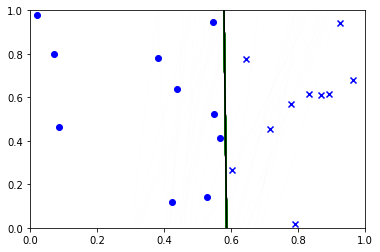

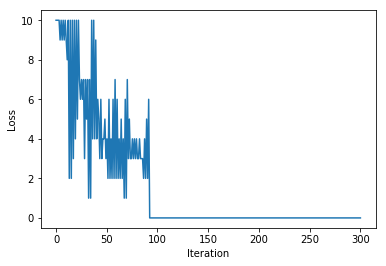

In [296]:
iters = 300

colors = np.array(
    list(zip(
        np.linspace(1, 0, iters), 
        [0.5] * iters,
        np.linspace(1, 0, iters)
    ))
)

plt.scatter(X_1[Y.astype(bool)], X_2[Y.astype(bool)], marker='x', color='b')
plt.scatter(X_1[(1 - Y).astype(bool)], X_2[(1 - Y).astype(bool)], marker='o', color='b')
plt.xlim([0, size])
plt.ylim([0, size])
W_update = W
losses = []
intercept = 0

for i in range(iters):
    plt.plot(
        [0, size], 
        [-W_update[0]/W_update[2], -(size*W_update[1] + W_update[0])/W_update[2]]
     , alpha=(i/iters)**3.9, color=colors[i])
    losses.append((~evaluate(classify(X, W_update), Y)).sum())
    W_update = update(X, W_update, Y)
#     print(i, W_update, losses[-1])
    intercept += e
    
plt.plot(
    [0, size], 
    [-W_update[0]/W_update[2], -(size*W_update[1] + W_update[0])/W_update[2]],
    alpha=(i/iters)**3, color='black')
plt.show()

plt.plot(np.linspace(0, len(losses), len(losses)), losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")

In [269]:
(X.T * W_update).sum(axis=1)

array([ -4029.3325831 ,  -3179.78749509,  -1720.94210337,   1415.12344944,
         5698.55839662,   4820.35506712,   6617.32993602,   4284.73657106,
         4731.08477524,  10371.10068966,   7185.61167534,   9320.29784489,
         9495.44688578,   7535.24705518,  16461.00909058,  16469.89930773,
        17419.70642478,  14053.6497672 ,  14513.07399167,  14520.13575541])

In [266]:
W_update[1:]

array([-196.01847265,  184.04433125])

In [ ]:
x * W_update[1] + y * W_update[2] + W_update[0] = 0

In [ ]:
y = - (x * W_update[1] - W_update[0]) / W_update[2]

In [264]:
W_update[1:]

array([-196.01847265,  184.04433125])